## 1. Чтение данных

In [126]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
%matplotlib inline

In [127]:
url = "https://raw.githubusercontent.com/iamshchikov-i/ML_Course/main/waterQuality.csv"
data_raw = pd.read_csv(url)

## 2. Обработка пропущенных (невалидных) значений

В данных присутствуют некоторые невалидные объекты с признаком *is_safe* = *#NUM!*

Необходимо удалить соответствующие объекты (3 шт.).

In [128]:
rows_to_drop = data_raw[
    ~((data_raw['is_safe'] == '0') | (data_raw['is_safe'] == '1'))].index
data = data_raw.drop(rows_to_drop)
data.shape

(7996, 21)

Категориальных признаков нет. Однако, некоторые столбцы имеют тип *object* из-за наличия невалидных значений (удалены на предыдущем шаге).

Приведем соответствующие столбцы к числовому типу *float64*

In [129]:
for feature in data.columns:
    if data[feature].dtype == 'object':
        data[feature] = data[feature].astype('float64')

## 3. Нормализация

In [130]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)
data_stand.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7.996000e+03,7.996000e+03,7.996000e+03,7.996000e+03,7.996000e+03,7996.000000,7.996000e+03,7.996000e+03,7.996000e+03,7.996000e+03,...,7.996000e+03,7.996000e+03,7.996000e+03,7.996000e+03,7.996000e+03,7.996000e+03,7.996000e+03,7.996000e+03,7.996000e+03,7.996000e+03
mean,-1.421796e-16,1.706156e-16,-5.687185e-17,-1.137437e-16,-2.701413e-16,0.000000,-1.137437e-16,-8.530778e-17,1.315162e-16,1.848335e-16,...,1.777245e-16,1.270731e-16,1.421796e-16,-1.866108e-17,1.706156e-16,-8.530778e-17,-3.776647e-17,-1.706156e-16,-1.550647e-16,8.530778e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-5.266605e-01,-1.617111e+00,-6.391775e-01,-1.289173e+00,-1.187357e+00,-0.848232,-9.136804e-01,-1.233089e+00,-1.772174e+00,-9.703093e-01,...,-1.709359e+00,-1.771796e+00,-2.319752e+00,-1.750033e+00,-9.308286e-01,-1.257146e+00,-1.726723e+00,-1.029552e+00,-1.660312e+00,-3.587823e-01
25%,-4.950480e-01,-8.673017e-01,-5.204279e-01,-8.287330e-01,-9.654388e-01,-0.809279,-7.289491e-01,-1.095389e+00,-8.363028e-01,-9.703093e-01,...,-8.841699e-01,-8.695904e-01,-5.753758e-01,-7.389592e-01,-8.081523e-01,-9.041251e-01,-1.031635e+00,-7.509395e-01,-9.169828e-01,-3.587823e-01
50%,-4.713387e-01,-1.669251e-02,-4.412615e-01,-3.107377e-01,-7.776576e-02,-0.641782,-5.811641e-01,-8.558893e-02,-3.779822e-03,-3.026241e-01,...,4.416754e-02,1.998391e-02,1.572622e-01,-6.490972e-02,-4.929816e-01,-2.196079e-01,1.099658e-02,-4.723272e-01,1.980103e-01,-3.587823e-01
75%,-3.053731e-01,8.845985e-01,-2.433455e-01,7.519748e-01,7.544278e-01,0.803367,7.119546e-01,8.936112e-01,8.919001e-01,8.809997e-01,...,8.865478e-01,8.644480e-01,7.503501e-01,9.461645e-01,7.361841e-01,7.533536e-01,7.060846e-01,6.421218e-01,9.413390e-01,-3.587823e-01
max,3.464415e+00,1.752665e+00,3.517058e+00,2.772567e+00,2.418815e+00,2.532871,2.411482e+00,1.826911e+00,1.672749e+00,2.064623e+00,...,1.728928e+00,1.806350e+00,2.791270e+00,1.620214e+00,2.461708e+00,2.182660e+00,1.748717e+00,2.453102e+00,1.684668e+00,2.786857e+00


## 4. Разбиение данных на обучающую и тестовую выборки

In [131]:
X = data_stand.drop(['is_safe'], axis=1)
y = data['is_safe']

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(5997, 1999)

## 5. Обучение MLPClassifier

In [133]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes = (2,),
                          solver = 'lbfgs', 
                          activation = 'relu',
                          random_state = 42,
                          max_iter=2000)
mlp_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(2,), max_iter=2000, random_state=42,
              solver='lbfgs')

Запуск инференса на обучающей и тестовой выборках с параметром **hidden_layer_sizes = (2,)**:

In [134]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

## 6. Ошибка на обучающей и тестовой выборках

Проверка качества для параметра **hidden_layer_sizes = (2,)**:

In [135]:
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.045856261464065365, 0.054527263631815905)

Проверка качества с параметром **hidden_layer_sizes = (1,)**:

In [136]:
mlp_model = MLPClassifier(hidden_layer_sizes = (1,),
                          solver = 'lbfgs', 
                          activation = 'relu',
                          random_state = 42,
                          max_iter=2000)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.09171252292813073, 0.09504752376188094)

## 7. Зависимость ошибки от параметра alpha

In [137]:
alpha_arr = np.logspace(-4, 3, 20)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(hidden_layer_sizes = (2,),
                          solver = 'lbfgs', 
                          activation = 'relu',
                          random_state = 42,
                          max_iter=2000,
                          alpha = alpha)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)

    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

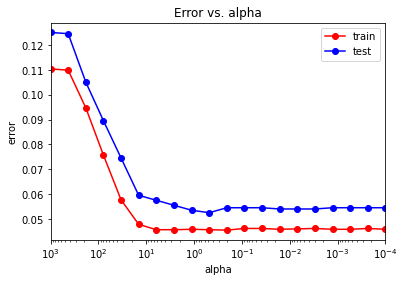

In [138]:
plt.semilogx(alpha_arr, train_err, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'b-o', label = 'test')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])

plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Исходя из графика, можно сказать, что при *alpha* > 10 наблюдается недообучение (большая ошибка как на обучающей, так и на тестовой выборках).

Минимальное значение ошибки:

In [139]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.04552276138069034 0.05252626313156578


Оптимальное значение *alpha*:

In [140]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[0.48329302]


### Классификатор при оптимальном значении alpha

In [142]:
mlp_model = MLPClassifier(hidden_layer_sizes = (2,),
                          solver = 'lbfgs', 
                          activation = 'relu',
                          random_state = 42,
                          max_iter=2000,
                          alpha = alpha_opt)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.04568951142237786, 0.05252626313156578)

## 8. Зависимость ошибки от количества нейронов

In [143]:
neuron_numbers = np.array([1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 15, 20, 25, 30, 40])
test_err = []
train_err = []
for neuron_number in neuron_numbers:
    mlp_model = MLPClassifier(hidden_layer_sizes = (2, neuron_number),
                          solver = 'lbfgs', 
                          activation = 'relu',
                          random_state = 42,
                          max_iter=2000,
                          alpha = alpha_opt)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)

    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

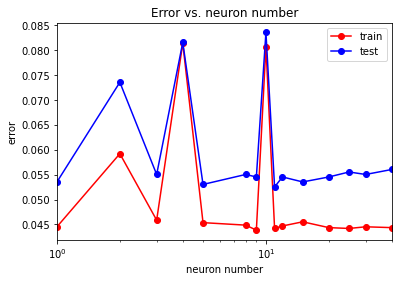

In [144]:
plt.semilogx(neuron_numbers, train_err, 'r-o', label = 'train')
plt.semilogx(neuron_numbers, test_err, 'b-o', label = 'test')
plt.xlim([np.min(neuron_numbers), np.max(neuron_numbers)])

plt.title('Error vs. neuron number')
plt.xlabel('neuron number')
plt.ylabel('error')
plt.legend()
pass

Исходя из графика, можно сказать, что при *neuron number* = 0, ..., 10 наблюдается значительное колебание величины ошибки (в некоторых случаях - недообучение). При увеличении числа нейронов ситуация "выравнивается". 

Минимальное значение ошибки:

In [145]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.04385526096381524 0.05252626313156578


Оптимальное значение *neuron number*:

In [146]:
neuron_number_opt = neuron_numbers[test_err == min_test_err]
print(neuron_number_opt)

[11]


### Классификатор при оптимальном значении числа нейронов

In [147]:
mlp_model = MLPClassifier(hidden_layer_sizes = (2, neuron_number_opt[0]),
                          solver = 'lbfgs', 
                          activation = 'relu',
                          random_state = 42,
                          max_iter=2000,
                          alpha = alpha_opt)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.04418876104719026, 0.05252626313156578)

## 9. Зависимость ошибки от количества слоев

In [164]:
layer_numbers = np.array([2, 3, 4, 5, 7, 10, 30, 50])
test_err = []
train_err = []
for ln in layer_numbers:
    mlp_model = MLPClassifier(hidden_layer_sizes = (ln, neuron_number_opt[0]),
                          solver = 'lbfgs', 
                          activation = 'relu',
                          random_state = 42,
                          max_iter=5000,
                          alpha = alpha_opt)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)

    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

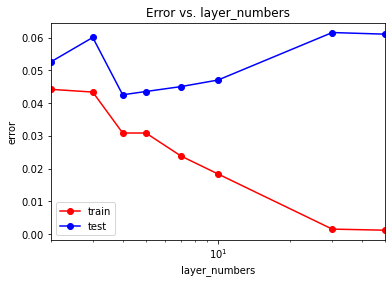

In [165]:
plt.semilogx(layer_numbers, train_err, 'r-o', label = 'train')
plt.semilogx(layer_numbers, test_err, 'b-o', label = 'test')
plt.xlim([np.min(layer_numbers), np.max(layer_numbers)])

plt.title('Error vs. layer_numbers')
plt.xlabel('layer_numbers')
plt.ylabel('error')
plt.legend()
pass

Исходя из графика, можно сказать, что при увеличении числа скрытых слоев, начиная с 5, наблюдается переобучение (высокая ошибка на тестовой выборке и значительно низкая ошибка на тренировочной).

Минимальное значение ошибки:

In [166]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.001167250291812573 0.04252126063031516


Оптимальное значение *layer number*:

In [168]:
layer_number_opt = layer_numbers[test_err == min_test_err]
print(layer_number_opt)

[4]


## 10. Общие выводы

В заключение можно подытожить:
- для текущей задачи при текущих входных данных при параметре *alpha* > 10 наблюдается недообучение;
- при изменяемом параметре *neuron number* < 10 наблюдается значительное колебание величины ошибки;
- при увеличении числа скрытых слоев, начиная с 5, наблюдается переобучение.